In this test, I aim to verify the correctness of the `ClassicalShadow_1_CLIFFORD` approximation. To do this, I will override the `get_random_rotations` method. Specifically, it will be modified to always return the Hadamar operator. When this is applied to a simple $|0\rangle$ state, it becomes poblaistic but possible calculate the density matrix that the shadow should approximate.

In [1]:
# Imports
import sys

from qiskit import QuantumCircuit, qasm2
from qiskit.quantum_info import Clifford, StabilizerState
from qiskit.visualization import array_to_latex
from qiskit_aer import AerSimulator

sys.path.insert(0, "../..")
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Clifford
from qiskit_aer import AerSimulator

from classical_shadow_1_clifford import ClassicalShadow_1_CLIFFORD
from shadow_protocol import ShadowProtocol

sys.path.insert(0, "../..")

from classical_shadow_1_clifford import ClassicalShadow_1_CLIFFORD
from shadow_protocol import ShadowProtocol

In [2]:
class Always_id_classical_shadow_1_clifford(ClassicalShadow_1_CLIFFORD):
    def get_random_rotations(self, num_qubits) -> list[Clifford]:
        qc_x = QuantumCircuit(1)
        qc_x.h(0)
        c_x = Clifford(qc_x)
        return [(c_x) for _ in range(num_qubits)]
    

# Setup Experiment
class Id_Protocol(ShadowProtocol):

    def get_num_qubits(self) -> int:
        return 2
    
    def get_state_circuit(self) -> QuantumCircuit:
        circuit = QuantumCircuit(2)
        return circuit

    def run_cuircuit_and_get_measurment(self, circuit) -> list[int]:
        sim = AerSimulator()

        # Run with 997 shots
        job = sim.run(circuit, shots=997)
        result = job.result()

        counts = result.get_counts()
        max_hits= max(counts, key=counts.get)
        bit_list =  [int(bit) for bit in list(max_hits)]
        return bit_list[::-1] 
    
id_protocol = Id_Protocol()
# Create Classical Shadow Instance
always_id = Always_id_classical_shadow_1_clifford(id_protocol)


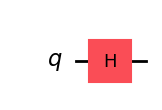

In [3]:
found_clifford = {}

for cliff in always_id.get_random_rotations(1000):
    circuit=cliff.to_circuit()
    program_as_string = qasm2.dumps(circuit)
    found_clifford[program_as_string]=cliff

cliffs = list(found_clifford.values())
assert len(cliffs) == 1
display(cliffs[0].to_circuit().draw("mpl"))

This means we will always apply the Haddamar rotation ($H$), so the state $\rho$ wil become in a super position

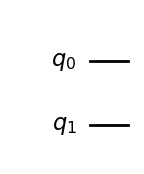

<IPython.core.display.Latex object>

In [4]:
circuit = always_id.shadow_protocol.get_state_circuit()
display(circuit.draw("mpl"))

dm = always_id.get_original_density_matrix()
display(array_to_latex(dm, prefix="Rho = "))

Putting this together, we expect a circuit that simply measures the qubits without applying any unitary gates beforehand.

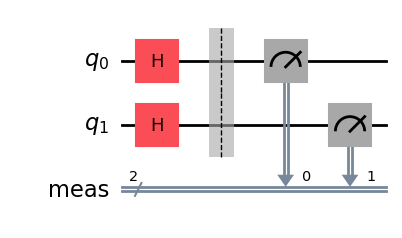

In [5]:

state_circuit = always_id.shadow_protocol.get_state_circuit()
cliffords = always_id.get_random_rotations(2) # will always be the same as showed before

combined_circuit: QuantumCircuit = always_id.make_rotated_state_circuit(
            cliffords, state_circuit
        )
display(combined_circuit.draw("mpl"))

For this circuit, we expect to have a 25% outocome 01 10 11 00

In [6]:
output = {}

for _ in range(100):
    measurement = str(always_id.shadow_protocol.run_cuircuit_and_get_measurment(combined_circuit))
    
    output[measurement] = output.get(measurement, 0) + 1

assert len(output) == 4

for outcome, count in output.items():
    print(outcome, count)

[0, 1] 30
[1, 0] 33
[1, 1] 15
[0, 0] 22


We have 4 outcomes with same problility so we need to calcualte every rotated back result:

00:

In [7]:
stabilizers: list[StabilizerState] = (
            always_id.compute_clifford_applied_to_measurements(
                cliffords, [0,0]
            )
        )
for i , stab in enumerate(stabilizers):
    dm = always_id.stabilizer_to_density_matrix(stab)
    display(array_to_latex(dm, prefix=f"DM {i}= "))


--- Starte Snapshot-Berechnung ---
Measurements Input: [0, 0]
Anzahl Cliffords: 2
Qubit 0:
  Gemessenes Bit: 0
  Clifford Operator: Clifford: Stabilizer = ['+X'], Destabilizer = ['+Z']
  -> Wähle Basis-Zustand: |0>
  -> Zustand nach Rückrotation (Snapshot): StabilizerState(['+X'])
Qubit 1:
  Gemessenes Bit: 0
  Clifford Operator: Clifford: Stabilizer = ['+X'], Destabilizer = ['+Z']
  -> Wähle Basis-Zustand: |0>
  -> Zustand nach Rückrotation (Snapshot): StabilizerState(['+X'])


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

01:

In [8]:
stabilizers: list[StabilizerState] = (
            always_id.compute_clifford_applied_to_measurements(
                cliffords, [0,1]
            )
        )
for i , stab in enumerate(stabilizers):
    dm = always_id.stabilizer_to_density_matrix(stab)
    display(array_to_latex(dm, prefix=f"DM {i}= "))


--- Starte Snapshot-Berechnung ---
Measurements Input: [0, 1]
Anzahl Cliffords: 2
Qubit 0:
  Gemessenes Bit: 0
  Clifford Operator: Clifford: Stabilizer = ['+X'], Destabilizer = ['+Z']
  -> Wähle Basis-Zustand: |0>
  -> Zustand nach Rückrotation (Snapshot): StabilizerState(['+X'])
Qubit 1:
  Gemessenes Bit: 1
  Clifford Operator: Clifford: Stabilizer = ['+X'], Destabilizer = ['+Z']
  -> Wähle Basis-Zustand: |1>
  -> Zustand nach Rückrotation (Snapshot): StabilizerState(['-X'])


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

10:

In [9]:
stabilizers: list[StabilizerState] = (
            always_id.compute_clifford_applied_to_measurements(
                cliffords, [1,0]
            )
        )
for i , stab in enumerate(stabilizers):
    dm = always_id.stabilizer_to_density_matrix(stab)
    display(array_to_latex(dm, prefix=f"DM {i}= "))


--- Starte Snapshot-Berechnung ---
Measurements Input: [1, 0]
Anzahl Cliffords: 2
Qubit 0:
  Gemessenes Bit: 1
  Clifford Operator: Clifford: Stabilizer = ['+X'], Destabilizer = ['+Z']
  -> Wähle Basis-Zustand: |1>
  -> Zustand nach Rückrotation (Snapshot): StabilizerState(['-X'])
Qubit 1:
  Gemessenes Bit: 0
  Clifford Operator: Clifford: Stabilizer = ['+X'], Destabilizer = ['+Z']
  -> Wähle Basis-Zustand: |0>
  -> Zustand nach Rückrotation (Snapshot): StabilizerState(['+X'])


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

11:

In [10]:
stabilizers: list[StabilizerState] = (
            always_id.compute_clifford_applied_to_measurements(
                cliffords, [1,1]
            )
        )
for i , stab in enumerate(stabilizers):
    dm = always_id.stabilizer_to_density_matrix(stab)
    display(array_to_latex(dm, prefix=f"DM {i}= "))


--- Starte Snapshot-Berechnung ---
Measurements Input: [1, 1]
Anzahl Cliffords: 2
Qubit 0:
  Gemessenes Bit: 1
  Clifford Operator: Clifford: Stabilizer = ['+X'], Destabilizer = ['+Z']
  -> Wähle Basis-Zustand: |1>
  -> Zustand nach Rückrotation (Snapshot): StabilizerState(['-X'])
Qubit 1:
  Gemessenes Bit: 1
  Clifford Operator: Clifford: Stabilizer = ['+X'], Destabilizer = ['+Z']
  -> Wähle Basis-Zustand: |1>
  -> Zustand nach Rückrotation (Snapshot): StabilizerState(['-X'])


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Since we always measure the same output, we can analytically determine the resulting matrices. We define them as follows:

$$
DM_0 = DM_1 =
\begin{pmatrix}
1 & 0\\
0 & 0
\end{pmatrix},
\quad
I =
\begin{pmatrix}
1 & 0\\
0 & 1
\end{pmatrix}
$$

We calculate the single-qubit snapshot matrix $A$:

$$
A = 3 DM_0 - I
= 3 \begin{pmatrix} 1 & 0 \\ 0 & 0 \end{pmatrix} - \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}
= \begin{pmatrix} 2 & 0 \\ 0 & -1 \end{pmatrix}
$$

Finally, we calculate the tensor product $A \otimes A$ for the two-qubit system:

$$
A \otimes A =
\begin{pmatrix} 2 & 0 \\ 0 & -1 \end{pmatrix} \otimes \begin{pmatrix} 2 & 0 \\ 0 & -1 \end{pmatrix}
=
\begin{pmatrix}
4 & 0 & 0 & 0\\
0 & -2 & 0 & 0\\
0 & 0 & -2 & 0\\
0 & 0 & 0 & 1
\end{pmatrix}
$$

In [11]:
always_id.add_snapshot()
dm = always_id.get_desity_matrix_from_stabilizers()
display(array_to_latex(dm, prefix=f"DM {i}= "))

--- Starte Snapshot-Berechnung ---
Measurements Input: [0, 0]
Anzahl Cliffords: 2
Qubit 0:
  Gemessenes Bit: 0
  Clifford Operator: Clifford: Stabilizer = ['+X'], Destabilizer = ['+Z']
  -> Wähle Basis-Zustand: |0>
  -> Zustand nach Rückrotation (Snapshot): StabilizerState(['+X'])
Qubit 1:
  Gemessenes Bit: 0
  Clifford Operator: Clifford: Stabilizer = ['+X'], Destabilizer = ['+Z']
  -> Wähle Basis-Zustand: |0>
  -> Zustand nach Rückrotation (Snapshot): StabilizerState(['+X'])


<IPython.core.display.Latex object>